### El tratamiento de las variables categoricas

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [8]:
df = pd.read_csv('python-ml-course-master/datasets/ecom-expense/Ecom Expense.csv')

In [10]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [11]:
dummy_gender = pd.get_dummies(df['Gender'],prefix = 'Gender')
dummy_city_tier = pd.get_dummies(df['City Tier'],prefix = 'City')

In [12]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [13]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [14]:
colum_names = df.columns.values.tolist()
colum_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [15]:
df_new = df[colum_names].join(dummy_gender)
colum_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [16]:
df_new = df_new[colum_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [40]:
feature_cols = ['Monthly Income','Transaction Time','Gender_Female','Gender_Male','City_Tier 1','City_Tier 2','City_Tier 3','Record']

In [41]:
X = df_new[feature_cols]
Y = df_new['Total Spend']

In [42]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
lm.intercept_, lm.coef_

(-79.4171303013718,
 array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
         7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02]))

In [44]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [45]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:  
* Total_Spend = 79.4171303013718 + 0.14753898049205738*Monthly Income + 0.15494612549589634* Transaction Time - 131.02501325554624* Gender_Female + 131.02501325554607* Gender_Male + 76.76432601049513* City_Tier_1 + 55.1389743092325* City_Tier 2 + -131.9033003197277*City_Tier 3 + 772.2334457445645*Record
* Si es hombre y vive en CT1: Total_Spend = 79.4171303013718 + 0.14753898049205738*Monthly Income + 0.15494612549589634* Transaction Time + 131.02501325554607 + 76.76432601049513 + 772.2334457445645*Record
* Si es hombre y vive en CT2: * Total_Spend = 79.4171303013718 + 0.14753898049205738*Monthly Income + 0.15494612549589634* Transaction Time  + 131.02501325554607 + 55.1389743092325+ 772.2334457445645*Record
* Si es hombre y vive en CT3: * Total_Spend = 79.4171303013718 + 0.14753898049205738*Monthly Income + 0.15494612549589634* Transaction Time +  131.02501325554607 +  -131.9033003197277 + 772.2334457445645*Record
* Si es mujer y vive en CT1: Total_Spend = 79.4171303013718 + 0.14753898049205738*Monthly Income + 0.15494612549589634* Transaction Time - 131.02501325554607 + 76.76432601049513 + 772.2334457445645*Record
    

In [47]:
df_new['prediction'] = -79.4171303013718 + df_new['Monthly Income']*0.14753898049205738 +df_new['Transaction Time']*0.15494612549589634 + -131.02501325554624*df_new['Gender_Female'] + 131.02501325554607*df_new['Gender_Male'] + df_new['City_Tier 1']*76.76432601049513 + df_new['City_Tier 2']*55.1389743092325 + df_new['City_Tier 3']*-131.9033003197277 + df_new['Record']*772.2334457445645

In [48]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [55]:
SSD = np.sum((df_new['prediction']-df_new['Total Spend'])**2)
SSD

1517733985.340816

In [56]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE #RSE bajito entonces es super preciso

803.1318809818165

In [57]:
sales_mean=np.mean(df_new['Total Spend'])
sales_mean

6163.176415976714

In [59]:
error = RSE/sales_mean
error*100 #En porcentaje

13.031135680294161

In [60]:
df_new["prediction_2"] = lm.predict(pd.DataFrame(df_new[feature_cols])) #Otra forma mas simple de realizar las predicciones
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction,prediction_2
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335,3581.980335


### Eliminar variables Dummy redundantes

In [61]:
dummy_gender = pd.get_dummies(df['Gender'],prefix='Gender').iloc[:,1:]

In [62]:
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [65]:
dummy_city_tier = pd.get_dummies(df['City Tier'],prefix='City').iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [66]:
colum_names = df.columns.values.tolist()
df_new = df[colum_names].join(dummy_gender)
colum_names=df_new.columns.values.tolist()
df_new = df_new[colum_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [67]:
feature_cols=['Monthly Income','Transaction Time','Gender_Male','City_Tier 2','City_Tier 3','City_Tier 3','Record']
X = df_new[feature_cols]
Y = df_new['Total Spend']
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
print(lm.intercept_)

-133.67781754642056


In [69]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589817),
 ('Gender_Male', 262.05002651109066),
 ('City_Tier 2', -21.625351701262858),
 ('City_Tier 3', -104.33381316511117),
 ('City_Tier 3', -104.33381316511162),
 ('Record', 772.2334457445637)]

In [70]:
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables del modelo
* [('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589634),
* ('Gender_Female', -131.02501325554624),
* ('Gender_Male', 131.02501325554607),
* ('City_Tier 1', 76.76432601049513),
* ('City_Tier 2', 55.1389743092325),
* ('City_Tier 3', -131.9033003197277),
* ('Record', 772.2334457445645)]
 
Coeficientes tras enmascarar las variables dummy pertinentes
* [('Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589817),
* ('Gender_Male', 262.05002651109066),
* ('City_Tier 2', -21.625351701262858),
* ('City_Tier 3', -104.33381316511117),
* ('City_Tier 3', -104.33381316511162),
* ('Record', 772.2334457445637)]

Los cambios estan en:
* Gender_Male:
    * antes 131.02
    * después => 262.05 = (131.02-(-131.02))
* Gender_Female:
    * antes -131.02 
    * después -> 0
* CT1: 
    * antes76.76 
    * después -> 0 
* CT2: 
    * antes -> 55.13
    * después -> -21.62 = (55.13-76-76)
* CT3:
    * antes -131.02
    * después -> -208.66 = (-131.90-76-76)

### Transformación de variables para conseguir una relación no lineal

In [71]:
import pandas as pd

In [72]:
data_auto = pd.read_csv('python-ml-course-master/datasets/auto/auto-mpg.csv')

In [73]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [75]:
data_auto.shape

(406, 9)

In [76]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

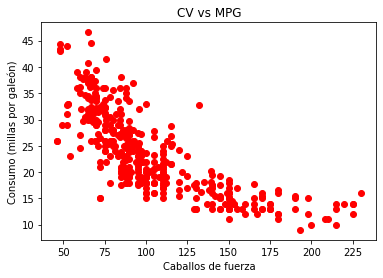

In [77]:
%matplotlib inline
data_auto['mpg'] = data_auto['mpg'].dropna()
data_auto['hoursepower'] = data_auto['horsepower'].dropna()
plt.plot(data_auto['horsepower'],data_auto['mpg'],'ro')
plt.xlabel('Caballos de fuerza')
plt.ylabel('Consumo (millas por galeón)')
plt.title('CV vs MPG')

## Modelo de regresión lineal
* mpg = $\alpha$ + $\beta$ * horsepower

In [85]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
X_data = X[:,np.newaxis] 

In [86]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

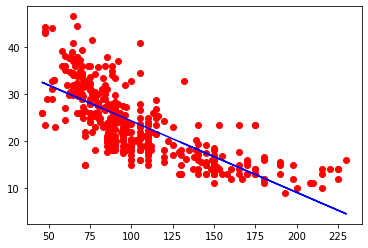

In [87]:
%matplotlib inline
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X_data),color = 'blue')

In [88]:
lm.score(X_data,Y)

0.574653340645025

In [95]:
SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD,RSE,error*100

(10315.75196006092, 5.046879480825511, 21.46277336163346)

### Modelo de regresión cuadrático
* mpg = $\alpha$ + $\beta$* $horsepower^2$

In [96]:
X_data = X**2
X_data = X_data[:,np.newaxis]

In [97]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
lm.score(X_data,Y)

0.4849887034823205

In [98]:
SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD,RSE,error*100

(12490.350340501926, 5.553410772769817, 23.6168898529981)

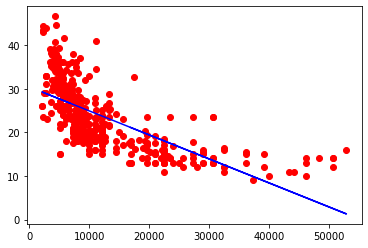

In [101]:
%matplotlib inline
plt.plot(X_data,Y,'ro')
plt.plot(X_data,lm.predict(X_data),color = 'blue')

### Modelo de regresión lineal y cuadrático
* $mpg = \alpha + \beta * horsepower + c * horsepower^2$

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [103]:
poly = PolynomialFeatures(degree = 2)

In [104]:
X_data = poly.fit_transform(X[:,np.newaxis])

In [105]:
lm = linear_model.LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
lm.score(X_data,Y)

0.6439066584257469

In [109]:
lm.intercept_

55.02619244708036

In [110]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

Modelo de polinomio de grado 2:  
$mpg = 55.026 -0.434 * hp + 0.00112615* hp^2$

In [121]:
for d in range(2,6):
    poly = PolynomialFeatures(degree = d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data,Y)
    print('Regresión de grado: ' + str(d))
    print(lm.score(X_data,Y))
    print(lm.intercept_)
    print(lm.coef_)
    print(regresion_validation(X_data,Y,lm.predict(X_data)))

Regresión de grado: 2
0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]
(8636.180643524502, 4.61778115803654, 19.63795466190689)
Regresión de grado: 3
0.6444678885560744
58.44877411191831
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
(8622.56936742855, 4.614140736300908, 19.622473106036676)
Regresión de grado: 4
0.6467674189704502
40.096643848138505
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
(8566.799832491353, 4.5991947315797574, 19.55891250126878)
Regresión de grado: 5
0.6547512489366876
-40.693812896755176
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]
(8373.171393636556, 4.546921735442387, 19.336612073193884)


In [120]:
def regresion_validation(X_data,Y,Y_pred):
    SSD = np.sum((Y-Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    return SSD,RSE,error*100

### El problema de los outliers

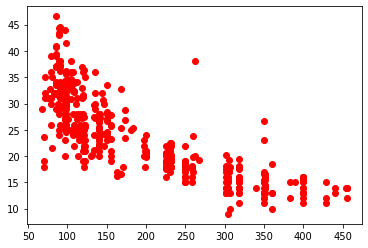

In [123]:
plt.plot(data_auto['displacement'],data_auto['mpg'],'ro')

In [125]:
lm = LinearRegression()
X = data_auto['displacement'].fillna(data_auto['displacement'].mean())
X = X[:,np.newaxis]
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
lm.score(X,Y)

0.6261049762826918

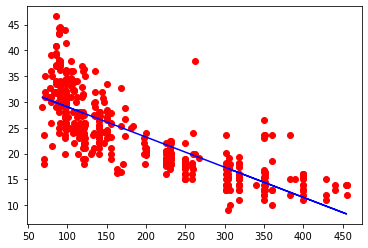

In [128]:
%matplotlib inline
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X),color = 'blue')

In [130]:
data_auto[(data_auto['displacement']>250) & (data_auto['mpg']>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,hoursepower
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel),85.0


In [131]:
data_auto[(data_auto['displacement']>300) & (data_auto['mpg']>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,hoursepower
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia,139.0
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado,125.0
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls,105.0


In [132]:
data_auto_clean = data_auto.drop([395,258,205,372])

In [133]:
lm = LinearRegression()
X = data_auto_clean['displacement'].fillna(data_auto_clean['displacement'].mean())
X = X[:,np.newaxis]
Y = data_auto_clean['mpg'].fillna(data_auto_clean['mpg'].mean())
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
lm.score(X,Y)

0.6426498969934056

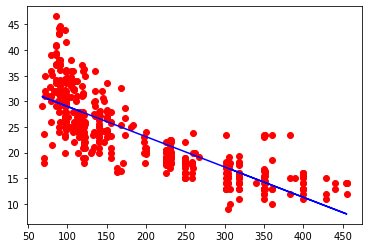

In [135]:
%matplotlib inline
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X),color = 'blue')

También se puede mirar el apalacamiento Leverage_i, se calcula para cada una de las filas del data set, si tienen un nivel alto puede significar un outlier